**Breast Cancer Wisconsin (Diagonistic) Data Set Cluster Analysis Using Different Techniques...**
> Two major clusters expected === Malignant(M) and Benign(B) ===

> **Techniques Implemented**

>> KMeans Clustering

>> Hierarchical Agglomerative Clustering  

>> DBSCAN (Density-Based Clustering of Applications with Noise) 

>> MeanShift Clustering

>> Spectral Clustering

>> Gaussian Mixture with Expectation Maximization (EM) Clustering

>> Gaussian Mixture with Variation Inference (VI) Clustering a.k.a Dirichlet Process


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['data.csv']


In [2]:
# Read the data file
data = pd.read_csv('../input/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Check for missing values
#data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# Preprocessing data set

# Drop unnecessary columns
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)
# Encode diagnosis label
data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})
# Featureset creation
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

Text(0.5,1,'KMeans clustering plot')

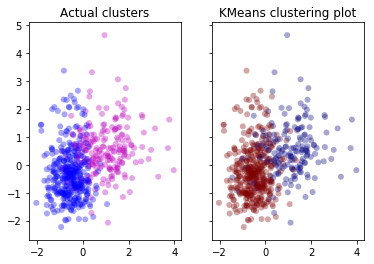

In [6]:
#1 KMeans Clustering >> k=2 i.e. either Malignant or Benign

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

Text(0.5,1,'Agglomeratve clustering plot')

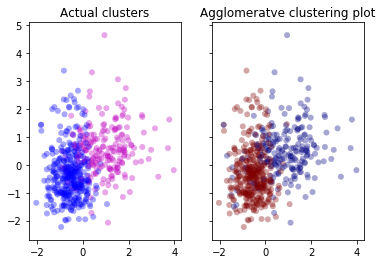

In [7]:
#2 Hierarchical Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering plot")

Text(0.5,1,'DBSCAN clustering plot')

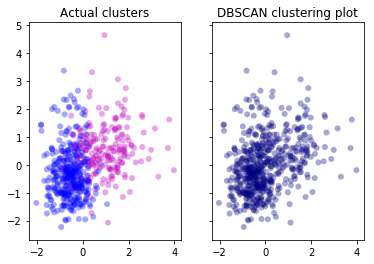

In [8]:
#3 DBSCAN (Density-Based Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=6)
dbs_pred = dbs.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=dbs_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("DBSCAN clustering plot")

Text(0.5,1,'MeanShift clustering plot')

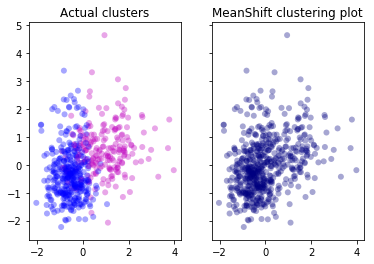

In [9]:
#4 MeanShift Clustering

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ms_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("MeanShift clustering plot")

Text(0.5,1,'Spectral clustering plot')

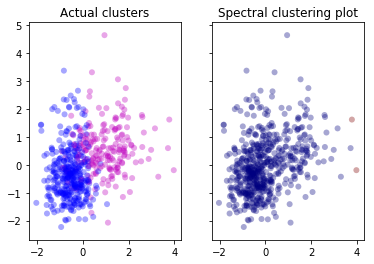

In [10]:
#5 Spectral Clustering

from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, gamma=0.5, affinity="rbf", assign_labels="discretize")
sc_pred = sc.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=sc_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Spectral clustering plot")

Text(0.5,1,'Gaussian Mix-EM clustering plot')

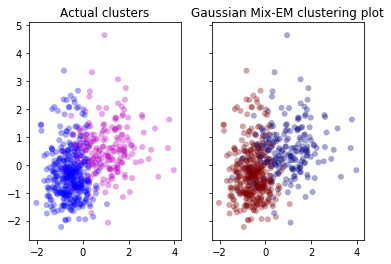

In [11]:
#6 Gaussian Mixture with Expectation Maximization (EM) Clustering
# Uses all specified components to fit.

from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, covariance_type="full")
gm_pred = gm.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=gm_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix-EM clustering plot")

Text(0.5,1,'Gaussian Mix-VI clustering plot')

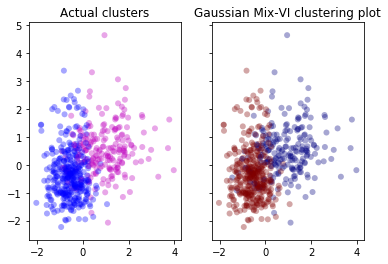

In [12]:
#7 Gaussian Mixture with Variation Inference (VI) Clustering >> Dirichlet process.
# Uses only as much as needed components for a good fit.

from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=2, covariance_type="full")
bgm_pred = bgm.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=bgm_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix-VI clustering plot")